## LLM

In [1]:
#Groq Gateway:
#https://console.groq.com/docs/models
#base_url="https://api.groq.com/openai/v1",

In [13]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv
import os
# Load environment variables from .env
load_dotenv()

True

In [18]:
groq_api_key=os.getenv('groq_api_key')

In [15]:
llm=ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000027A9A39C950>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000027A99B1EDD0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Agents

In [4]:
#LangGraph
#https://www.langchain.com/langgraph
#https://www.langchain.com/langsmith

In [16]:
api_key = os.getenv("LANGCHAIN_API_KEY")
project = os.getenv("LANGCHAIN_PROJECT")
tracing = os.getenv("LANGCHAIN_TRACING_V2")

# Set them as needed (if required by downstream packages)
os.environ["LANGCHAIN_API_KEY"] = api_key
os.environ["LANGCHAIN_TRACING_V2"] = tracing
os.environ["LANGCHAIN_PROJECT"] = project

In [6]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [16]:
class State(TypedDict):
  # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)
graph_builder

In [17]:
def chatbot(state:State):
  return {"messages":llm.invoke(state['messages'])}

graph_builder.add_node("chatbot",chatbot)
graph_builder

In [18]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)
graph=graph_builder.compile()

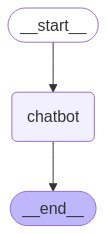

In [19]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [15]:
while True:
  user_input=input("User: ")
  if user_input.lower() in ["quit","q"]:
    print("Good Bye")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User:  Hi


dict_values([{'messages': AIMessage(content='Hi! 👋\n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001944666, 'queue_time': 0.231736325, 'total_time': 0.029217393}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-0473a410-bc51-4fea-acee-1e7bf36a0b99-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})}])
content='Hi! 👋\n\nHow can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001944666, 'queue_time': 0.231736325, 'total_time': 0.029217393}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-0473a410-bc51-4fea-acee-1e7

User:  whats todays date?


dict_values([{'messages': AIMessage(content="Today's date is October 26, 2023.\n", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 13, 'total_tokens': 32, 'completion_time': 0.034545455, 'prompt_time': 0.001905265, 'queue_time': 0.23278558400000002, 'total_time': 0.03645072}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-46f54db5-fe43-42c3-8393-ac93fdd69434-0', usage_metadata={'input_tokens': 13, 'output_tokens': 19, 'total_tokens': 32})}])
content="Today's date is October 26, 2023.\n" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 13, 'total_tokens': 32, 'completion_time': 0.034545455, 'prompt_time': 0.001905265, 'queue_time': 0.23278558400000002, 'total_time': 0.03645072}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-46f54db5-fe43-42c3-

User:  bye


dict_values([{'messages': AIMessage(content='Bye! Have a great day. 👋\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 11, 'total_tokens': 22, 'completion_time': 0.02, 'prompt_time': 0.001924715, 'queue_time': 0.23386474200000001, 'total_time': 0.021924715}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-7dda0e23-34dc-45ca-a58b-faaea8f4a203-0', usage_metadata={'input_tokens': 11, 'output_tokens': 11, 'total_tokens': 22})}])
content='Bye! Have a great day. 👋\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 11, 'total_tokens': 22, 'completion_time': 0.02, 'prompt_time': 0.001924715, 'queue_time': 0.23386474200000001, 'total_time': 0.021924715}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-7dda0e23-34dc-45ca-a58b-faaea8f4a203-0' usage_met

User:  q


Good Bye
